<a href="https://colab.research.google.com/github/SirGabriel22/aws-iot-device-sdk-python/blob/master/Tratamento_de_dados_tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sbn
import statistics as sts

Com a biblioteca "pandas", visualizamos os dados de forma tabular, ou seja, como se fosse uma matriz.
Com a biblioteca "seaborn", faremos gráficos dos dados recebidos.
Por fim, com a biblioteca "statistics", faremos operações estatísticas básicas e a utilizaremos também para subsitituir outliers pela mediana, como veremos adiante.

Inicialmente, vamos ler o arquivo "tempo.csv" e deduzir os seus dados.

In [14]:
# importação
dataset = pd.read_csv("tempo.csv", sep = ";")
# visualização dos dados
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


Como primeiro passo do tratamento, corrigiremos os dados qualitativos.

In [15]:
"""Visualização do tamanho da matriz de dados"""
dataset.shape
# 14 linhas e 5 colunas.
"""Lembrando: cada coluna se chama 'atributo'"""

"Lembrando: cada coluna se chama 'atributo'"

In [16]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


Vemos que a moda ocorre em dois atributos. Vamos substituir pelo padrão do sistema.

In [17]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

,0
Vento,
FALSO,7
VERDADEIRO,6


Não há outliers.

In [18]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

,0
Jogar,
nao,5
sim,9


Também não há  outliers

Agora, vamos para a análise de dados quantitativos.

In [19]:
dataset["Temperatura"].describe()

,Temperatura
count,14.000000
mean,155.571429
std,306.433759
min,64.000000
25%,69.250000
50%,73.500000
75%,80.750000
max,1220.000000


Cabe observar:
- Não há dados textuais
- A mediana é bem maior que a média, então vamos ter que substituir calculando o desvio padrão
- A temperatura máxima é de 1220°F, o que deve ser substituído.

Text(0.5, 1.0, 'Temperatura')

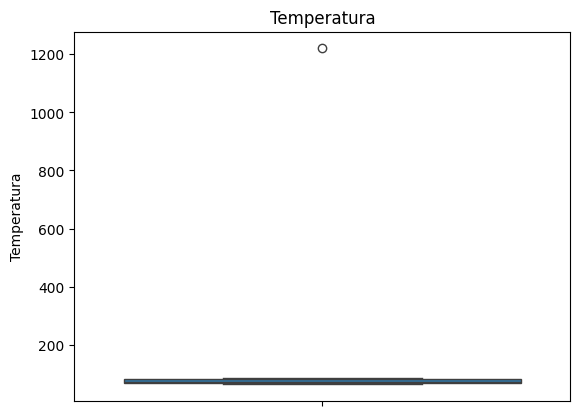

In [20]:
sbn.boxplot(dataset['Temperatura']).set_title("Temperatura")

/tmp/ipython-input-21-2105091755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset['Temperatura']).set_title("Temperatura")


Text(0.5, 1.0, 'Temperatura')

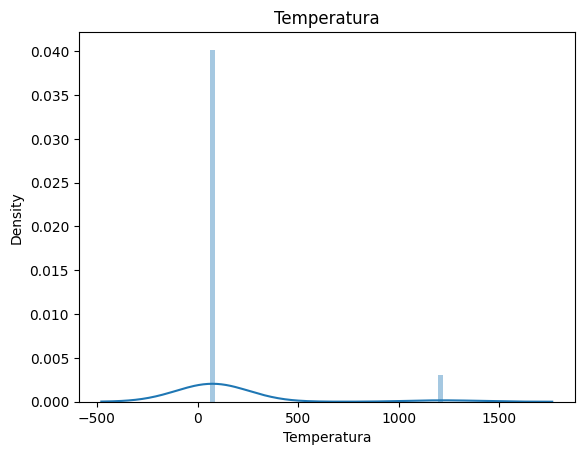

In [21]:
sbn.distplot(dataset['Temperatura']).set_title("Temperatura")

Os gráficos não apresentam outliers. Vamos a outras checagens.

In [22]:
dataset['Umidade'].describe()

,Umidade
count,13.000000
mean,89.769231
std,34.540203
min,65.000000
25%,70.000000
50%,85.000000
75%,90.000000
max,200.000000


Cabe observar:
- Foram totalizados 13 elementos, ou seja, há um valor não atribuído.
- A média está próxima da mediana, então não será necessário substituir calculando o desvio padrão
- A umidade máxima é de 200%, o que deve ser substituído.

In [23]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

,0
Umidade,
65.0,1
70.0,3
75.0,1
80.0,1
85.0,1
86.0,1
90.0,2
91.0,1
95.0,1


Não há dados textuais.

In [24]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

,0
Temperatura,
64,1
65,1
68,1
69,1
70,1
71,1
72,1
75,2
80,1


Também não há dados textuais.

Para a substituição dos dados, utilizaremos o seguinte padrão:


*   Dados qualitativos: moda (isso é, os dados com maior ocorrência)
*   Dados quantitativos: mediana (ou seja, valor central de um conjunto de dados ordenados)


## PRIMEIRA ETAPA DE SUBSTITUIÇÃO:
Substituiremos, primeiramente, os dados qualitativos. Faremos isso a partir dos atributos mais à esquerda da tabela.

In [26]:
# Checagem de N/As totais
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


Há apenas dois N/As totais. Um de atributo qualitativo e outro de atributo quantitativo. Faremos o preenchimento deles mais adiante.

In [32]:
# Cálculo da moda no atributo Aparencia:
moda = sts.mode(dataset['Aparencia'])
moda
# A moda é 'sol'. Agora, vamos substituir:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = moda
print(dataset.groupby(['Aparencia']).size())
#Substituição feita com sucesso!.

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64


Primeira etapa já resolvida. Vamos à segunda etapa.

In [39]:
print(dataset['Vento'].isnull().sum())
# Como visto anteriormente, só há um N/A. Vamos calcular a moda para preencher.
moda = sts.mode(dataset['Vento'])
moda
# A moda é "FALSO". Vamos substituir:
dataset['Vento'].fillna('FALSO', inplace = True)
dataset['Vento'].isnull().sum()
# Não há mais N/A. Vamos checar como ficou a coluna
print(dataset.groupby(['Vento']).size())
# Deu certo.

0
Vento
FALSO         8
VERDADEIRO    6
dtype: int64


Agora, vamos pra substituição do último dado qualitativo:

In [40]:
print(dataset['Jogar'].isnull().sum())
# Não há N/A e nem outliers, então não há nada a ser feito aqui.

0


## SEGUNDA ETAPA DE SUBSTITUIÇÃO:
Agora, substituiremos os dados quantitativos. Começaremos pela coluna "Temperatura", pois não há N/A.

In [48]:
dataset['Temperatura'].describe()
# Vamos definir como critério o que foi pedido: A temperatura tem que ser entre -130°F e 130°F
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]
# Há um registro dessa ocorrência.
mediana = sts.median(dataset['Temperatura']) # Lembrete: a mediana é menos sujeita a outliers!
mediana # A mediana é de 73.5°F
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] = mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]
# Não há valores fora desse domínio. Agora, vamos fazer a checagem geral:
dataset["Temperatura"].describe()
# A média está num valor aproximado em relação à mediana. Nada mais a se fazer.

,Temperatura
count,14.000000
mean,73.678571
std,6.556286
min,64.000000
25%,69.250000
50%,72.750000
75%,78.750000
max,85.000000


Agora, vamos ao último tratamento de dados:

In [56]:
dataset['Umidade'].describe()
# Utilizaremos o mesmo critério: 0 < umidade < 100%
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]
# Há um registro dessa ocorrência.
mediana = sts.median(dataset['Umidade'])
mediana # A mediana é de 82.5%.
dataset['Umidade'].fillna(mediana, inplace = True)
dataset['Umidade'].isnull().sum() # Não tem mais N/A. Vamos, agora, substituir o valor mais discrepante.
print(dataset.groupby(['Umidade']).size())
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] = mediana
dataset['Umidade'].describe() # Deu certo!

Umidade
65.00    1
70.00    3
73.50    1
75.00    1
80.00    1
81.25    1
82.50    1
85.00    1
86.00    1
90.00    2
91.00    1
dtype: int64


/tmp/ipython-input-56-1458378015.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana, inplace = True)


,Umidade
count,14.000000
mean,79.232143
std,8.654959
min,65.000000
25%,70.875000
50%,80.625000
75%,85.750000
max,91.000000
